In [1]:
using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


In [2]:
using MLJ
import Flux
using MLJFlux
using CategoricalArrays

┌ Info: Recompiling stale cache file /home/ayush99/.julia/compiled/v1.1/MLJ/rAU56.ji for MLJ [add582a8-e3ab-11e8-2d5e-e98b27df1bc7]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/ayush99/.julia/compiled/v1.1/Flux/QdkVy.ji for Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/ayush99/.julia/compiled/v1.1/MLJFlux/fHjkl.ji for MLJFlux [094fc8d1-fd35-5302-93ea-dabda2abf845]
└ @ Base loading.jl:1184
┌ Warning: Package MLJFlux does not have CategoricalArrays in its dependencies:
│ - If you have MLJFlux checked out for development and have
│   added CategoricalArrays as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with MLJFlux
└ Loading CategoricalArrays into MLJFlux from project dependency, future warnings for MLJFlux are suppressed.


Loading the boston dataset:

In [3]:
task = load_boston()
X_, y_ = task();

Standardizing the inputs:

In [4]:
ustand_model = UnivariateStandardizer()
ustand = machine(ustand_model, y_)
fit!(ustand)
y = transform(ustand, y_);

┌ Info: Training Machine{UnivariateStandardizer} @ 1…65.
└ @ MLJ /home/ayush99/.julia/packages/MLJ/XYSFt/src/machines.jl:135


In [5]:
stand_model = Standardizer()
stand = machine(stand_model, X_)
fit!(stand)
X = transform(stand, X_);

┌ Info: Training Machine{Standardizer} @ 1…97.
└ @ MLJ /home/ayush99/.julia/packages/MLJ/XYSFt/src/machines.jl:135


Implementing a small NN 

In [11]:
builder = MLJFlux.Short()
optimiser = Flux.Momentum(0.003)
nnmodel = NeuralNetworkRegressor(builder=builder, optimiser=optimiser, embedding_choice=:entity_embedding)

NeuralNetworkRegressor(builder = Short @ 1…48,
                       optimiser = Flux.Optimise.Momentum(0.003, 0.9, IdDict{Any,Any}()),
                       loss = Flux.mse,
                       n = 10,
                       batch_size = 1,
                       lambda = 0.0,
                       alpha = 0.0,
                       optimiser_changes_trigger_retraining = false,
                       embedding_choice = :entity_embedding,) @ 5…58

In [12]:
mach = machine(nnmodel, X, y)

Machine{NeuralNetworkRegressor} @ 1…62


In [13]:
fit!(mach, verbosity=2)

┌ Info: Training Machine{NeuralNetworkRegressor} @ 1…62.
└ @ MLJ /home/ayush99/.julia/packages/MLJ/XYSFt/src/machines.jl:135


Loss is 468.85205773687596
Loss is 459.90886444075613
Loss is 432.5289814687344
Loss is 456.89556067943533
Loss is 409.1867059074019
Loss is 508.9516599232585
Loss is 421.36345508593985
Loss is 342.75609156416385
Loss is 314.7598726462114
Loss is 382.0540871664296


Machine{NeuralNetworkRegressor} @ 1…62


In [9]:
nnmodel.n = 20

20

In [10]:
fit!(mach, verbosity= 2)

┌ Info: Updating Machine{NeuralNetworkRegressor} @ 1…66.
└ @ MLJ /home/ayush99/.julia/packages/MLJ/XYSFt/src/machines.jl:147


Loss is 399.90564562761534
Loss is 429.97053926397297
Loss is 422.1505175376968
Loss is 387.94903548497666
Loss is 435.0446561578859
Loss is 369.027124679459
Loss is 343.7610727606283
Loss is 413.519834234033
Loss is 370.0416672164816
Loss is 392.73581579884404


Machine{NeuralNetworkRegressor} @ 1…66


Defining our own NN:

In [11]:
struct mynn <: MLJFlux.Builder
    d1
    d2
end

function MLJFlux.fit(nn::mynn, a, b)
    return Flux.Chain(Flux.Dense(a, nn.d1), Flux.Dense(nn.d1, nn.d2), Flux.Dense(nn.d2, b))
end

In [12]:
optimiser = Flux.Momentum(0.00003)
builder = mynn(3, 4)
nnmodel = NeuralNetworkRegressor(builder=builder, optimiser=optimiser)

NeuralNetworkRegressor(builder = mynn @ 9…34,
                       optimiser = Flux.Optimise.Momentum(3.0e-5, 0.9, IdDict{Any,Any}()),
                       loss = Flux.mse,
                       n = 10,
                       batch_size = 1,
                       lambda = 0.0,
                       alpha = 0.0,
                       optimiser_changes_trigger_retraining = false,
                       embedding_choice = :onehot,) @ 1…56

In [13]:
mymach = machine(nnmodel, X, y)

Machine{NeuralNetworkRegressor} @ 7…20


In [14]:
fit!(mymach, verbosity=2)

┌ Info: Training Machine{NeuralNetworkRegressor} @ 7…20.
└ @ MLJ /home/ayush99/.julia/packages/MLJ/XYSFt/src/machines.jl:135
┌ Info: Training Machine{OneHotEncoder} @ 1…02.
└ @ MLJ /home/ayush99/.julia/packages/MLJ/XYSFt/src/machines.jl:135


Loss is 422.2894499164513
Loss is 374.83798083360784
Loss is 351.5705866582662
Loss is 334.0529805043895
Loss is 318.0786496610275
Loss is 302.8122034567332
Loss is 288.16916863482874
Loss is 274.23267152479906
Loss is 261.11540756272274
Loss is 248.91781787424466


Machine{NeuralNetworkRegressor} @ 7…20


┌ Info: Training Machine{DeterministicTunedModel} @ 9…58.
└ @ MLJ /home/ayush99/.julia/packages/MLJ/XYSFt/src/machines.jl:135
Iterating over a 30-point grid:   3%[>                        ]  ETA: 0:00:03┌ Info: Training Machine{OneHotEncoder} @ 1…45.
└ @ MLJ /home/ayush99/.julia/packages/MLJ/XYSFt/src/machines.jl:135
Iterating over a 30-point grid: 100%[=========================] Time: 0:00:06
┌ Info: Not retraining Machine{DeterministicTunedModel} @ 9…58.
│  It appears up-to-date. Use force=true to force retraining.
└ @ MLJ /home/ayush99/.julia/packages/MLJ/XYSFt/src/machines.jl:141
┌ Info: Not retraining Machine{DeterministicTunedModel} @ 9…58.
│  It appears up-to-date. Use force=true to force retraining.
└ @ MLJ /home/ayush99/.julia/packages/MLJ/XYSFt/src/machines.jl:141
┌ Info: Not retraining Machine{DeterministicTunedModel} @ 9…58.
│  It appears up-to-date. Use force=true to force retraining.
└ @ MLJ /home/ayush99/.julia/packages/MLJ/XYSFt/src/machines.jl:141


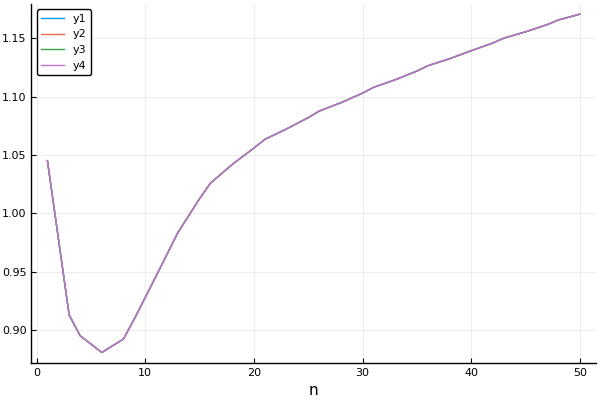

In [15]:
# learning curves:
nn = machine(nnmodel, X, y)
r = range(nnmodel, :n, lower=1, upper=50)
curve = learning_curve!(nn, nested_range=(n=r,), n=4)

using Plots
pyplot()

plot(curve.parameter_values, curve.measurements,
     xlab=curve.parameter_name)